Machine Learning Model for Dengue Fever in San Juan and Iquitos
----

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from dengai import data_util
from dengai import multi_perceptron

Preprocess Data
----

In [2]:
sj, iq = data_util.get_train_feature_label()

sj_features = sj.drop(["total_cases"], axis=1)
sj_labels = sj[["total_cases"]]

iq_features = iq.drop(["total_cases"], axis=1)
iq_labels = iq[["total_cases"]]


Split Testing Data and Randomize
----

In [3]:
# Split data intro training and testing sets
sj_x_train, sj_x_test, sj_y_train, sj_y_test = train_test_split(sj_features, 
                                                                sj_labels, 
                                                                test_size=0.33, 
                                                                random_state=42)

iq_x_train, iq_x_test, iq_y_train, iq_y_test = train_test_split(iq_features, 
                                                                iq_labels, 
                                                                test_size=0.33, 
                                                                random_state=42)

Model Training for San Juan
----

In [ ]:
# Add 2 hidden layers, each with 256 nodes
sj_x_size = sj_x_train.shape[1] # Number of input nodes
sj_h1_size = 256 # Number of hidden nodes for l1
sj_h2_size = 256 # Number of hidden nodes for l2
sj_y_size = sj_y_train.shape[1] # Number of outcomes 

sj_x = tf.placeholder("float32", [None, sj_x_size])
sj_y = tf.placeholder("float32", [None, sj_y_size])
sj_keep_prob = tf.placeholder(tf.float32)
                                
#l1 = multi_perceptron.add_layer(x, in_size=x_size, out_size=h1_size, activation_function=tf.nn.relu)
#predict = multi_perceptron.add_layer(l1, in_size=h1_size, out_size=y_size, activation_function=None)
 
# Weight initializations
sj_w_1 = multi_perceptron.init_weights((sj_x_size, sj_h1_size))
sj_w_2 = multi_perceptron.init_weights((sj_h1_size, sj_h2_size))
sj_w_3 = multi_perceptron.init_weights((sj_h2_size, sj_y_size))

sj_predict = multi_perceptron.forwardprop(sj_x, sj_w_1, sj_w_2, sj_w_3, sj_keep_prob)
    

In [5]:
# Backwards Propogation
sj_cost = tf.reduce_mean(tf.reduce_sum(tf.square(sj_y-sj_predict),reduction_indices=[1]))
sj_updates = tf.train.GradientDescentOptimizer(0.00000001).minimize(sj_cost)

In [6]:
sj_init = tf.global_variables_initializer()
sj_sess = tf.Session()
sj_sess.run(sj_init)

In [8]:
for epoch in range(300):
        # Train with each example
        for i in range(len(sj_x_train)):
            sj_sess.run(sj_updates, feed_dict={sj_x: sj_x_train[i: i + 1], sj_y: sj_y_train[i: i + 1], sj_keep_prob:0.7})

        train_error = mean_absolute_error(sj_y_train, sj_sess.run(sj_predict, feed_dict={sj_x: sj_x_train, sj_keep_prob:1}))
        test_error  = mean_absolute_error(sj_y_test, sj_sess.run(sj_predict, feed_dict={sj_x: sj_x_test, sj_keep_prob:1}))

        print("Epoch = %d, train error = %.2f, test error = %.2f"
              % (epoch + 1, train_error, test_error))

Epoch = 1, train error = 32.89, test error = 30.98
Epoch = 2, train error = 32.75, test error = 30.85
Epoch = 3, train error = 32.48, test error = 30.59
Epoch = 4, train error = 32.39, test error = 30.51
Epoch = 5, train error = 32.31, test error = 30.43
Epoch = 6, train error = 32.24, test error = 30.36
Epoch = 7, train error = 32.16, test error = 30.28
Epoch = 8, train error = 32.08, test error = 30.21
Epoch = 9, train error = 32.01, test error = 30.14
Epoch = 10, train error = 31.94, test error = 30.07
Epoch = 11, train error = 31.87, test error = 30.01
Epoch = 12, train error = 31.80, test error = 29.94
Epoch = 13, train error = 31.74, test error = 29.87
Epoch = 14, train error = 31.66, test error = 29.80
Epoch = 15, train error = 31.56, test error = 29.70
Epoch = 16, train error = 31.48, test error = 29.63
Epoch = 17, train error = 31.39, test error = 29.54
Epoch = 18, train error = 31.32, test error = 29.47
Epoch = 19, train error = 31.26, test error = 29.41
Epoch = 20, train err

Epoch = 158, train error = 25.98, test error = 24.90
Epoch = 159, train error = 25.97, test error = 24.89
Epoch = 160, train error = 25.95, test error = 24.87
Epoch = 161, train error = 25.93, test error = 24.86
Epoch = 162, train error = 25.92, test error = 24.85
Epoch = 163, train error = 25.90, test error = 24.83
Epoch = 164, train error = 25.88, test error = 24.82
Epoch = 165, train error = 25.87, test error = 24.81
Epoch = 166, train error = 25.85, test error = 24.79
Epoch = 167, train error = 25.84, test error = 24.78
Epoch = 168, train error = 25.82, test error = 24.77
Epoch = 169, train error = 25.80, test error = 24.75
Epoch = 170, train error = 25.79, test error = 24.74
Epoch = 171, train error = 25.77, test error = 24.73
Epoch = 172, train error = 25.76, test error = 24.72
Epoch = 173, train error = 25.74, test error = 24.70
Epoch = 174, train error = 25.72, test error = 24.69
Epoch = 175, train error = 25.71, test error = 24.68
Epoch = 176, train error = 25.69, test error =

Model Training for Iquitos
---

In [9]:
# Add 2 hidden layers, each with 256 nodes
iq_x_size = iq_x_train.shape[1] # Number of input nodes
iq_h1_size = 256 # Number of hidden nodes for l1
iq_h2_size = 256 # Number of hidden nodes for l2
iq_y_size = iq_y_train.shape[1] # Number of outcomes 

iq_x = tf.placeholder("float32", [None, iq_x_size])
iq_y = tf.placeholder("float32", [None, iq_y_size])
iq_keep_prob = tf.placeholder(tf.float32)
                                
#l1 = multi_perceptron.add_layer(x, in_size=x_size, out_size=h1_size, activation_function=tf.nn.relu)
#predict = multi_perceptron.add_layer(l1, in_size=h1_size, out_size=y_size, activation_function=None)
 
# Weight initializations
iq_w_1 = multi_perceptron.init_weights((iq_x_size, iq_h1_size))
iq_w_2 = multi_perceptron.init_weights((iq_h1_size, iq_h2_size))
iq_w_3 = multi_perceptron.init_weights((iq_h2_size, iq_y_size))

iq_predict = multi_perceptron.forwardprop(iq_x, iq_w_1, iq_w_2, iq_w_3, iq_keep_prob)
    

In [10]:
# Backwards Propogation
iq_cost = tf.reduce_mean(tf.reduce_sum(tf.square(iq_y-iq_predict),reduction_indices=[1]))
iq_updates = tf.train.GradientDescentOptimizer(0.00000001).minimize(iq_cost)

In [11]:
iq_init = tf.global_variables_initializer()
iq_sess = tf.Session()
iq_sess.run(iq_init)

In [12]:
for epoch in range(550):
        # Train with each example
        for i in range(len(iq_x_train)):
            iq_sess.run(iq_updates, feed_dict={iq_x: iq_x_train[i: i + 1], iq_y: iq_y_train[i: i + 1], iq_keep_prob:0.7})

        train_error = mean_absolute_error(iq_y_train, iq_sess.run(iq_predict, feed_dict={iq_x: iq_x_train, iq_keep_prob:1}))
        test_error  = mean_absolute_error(iq_y_test, iq_sess.run(iq_predict, feed_dict={iq_x: iq_x_test, iq_keep_prob:1}))

        print("Epoch = %d, train error = %.2f, test error = %.2f"
              % (epoch + 1, train_error, test_error))

Epoch = 1, train error = 8.75, test error = 8.18
Epoch = 2, train error = 8.64, test error = 8.07
Epoch = 3, train error = 8.58, test error = 8.01
Epoch = 4, train error = 8.54, test error = 7.97
Epoch = 5, train error = 8.49, test error = 7.92
Epoch = 6, train error = 8.38, test error = 7.81
Epoch = 7, train error = 8.30, test error = 7.73
Epoch = 8, train error = 8.27, test error = 7.70
Epoch = 9, train error = 8.25, test error = 7.68
Epoch = 10, train error = 8.23, test error = 7.66
Epoch = 11, train error = 8.21, test error = 7.65
Epoch = 12, train error = 8.20, test error = 7.63
Epoch = 13, train error = 8.19, test error = 7.62
Epoch = 14, train error = 8.17, test error = 7.61
Epoch = 15, train error = 8.16, test error = 7.59
Epoch = 16, train error = 8.15, test error = 7.58
Epoch = 17, train error = 8.14, test error = 7.57
Epoch = 18, train error = 8.13, test error = 7.56
Epoch = 19, train error = 8.12, test error = 7.55
Epoch = 20, train error = 8.10, test error = 7.54
Epoch = 2

Epoch = 164, train error = 7.08, test error = 6.62
Epoch = 165, train error = 7.07, test error = 6.62
Epoch = 166, train error = 7.07, test error = 6.62
Epoch = 167, train error = 7.07, test error = 6.61
Epoch = 168, train error = 7.06, test error = 6.61
Epoch = 169, train error = 7.06, test error = 6.61
Epoch = 170, train error = 7.05, test error = 6.60
Epoch = 171, train error = 7.05, test error = 6.60
Epoch = 172, train error = 7.04, test error = 6.60
Epoch = 173, train error = 7.04, test error = 6.59
Epoch = 174, train error = 7.04, test error = 6.59
Epoch = 175, train error = 7.03, test error = 6.59
Epoch = 176, train error = 7.03, test error = 6.58
Epoch = 177, train error = 7.02, test error = 6.58
Epoch = 178, train error = 7.02, test error = 6.58
Epoch = 179, train error = 7.01, test error = 6.57
Epoch = 180, train error = 7.01, test error = 6.57
Epoch = 181, train error = 7.01, test error = 6.56
Epoch = 182, train error = 7.00, test error = 6.56
Epoch = 183, train error = 7.00

Epoch = 325, train error = 6.46, test error = 6.11
Epoch = 326, train error = 6.46, test error = 6.11
Epoch = 327, train error = 6.46, test error = 6.10
Epoch = 328, train error = 6.45, test error = 6.10
Epoch = 329, train error = 6.45, test error = 6.10
Epoch = 330, train error = 6.45, test error = 6.10
Epoch = 331, train error = 6.45, test error = 6.10
Epoch = 332, train error = 6.45, test error = 6.09
Epoch = 333, train error = 6.44, test error = 6.09
Epoch = 334, train error = 6.44, test error = 6.09
Epoch = 335, train error = 6.44, test error = 6.09
Epoch = 336, train error = 6.44, test error = 6.09
Epoch = 337, train error = 6.43, test error = 6.09
Epoch = 338, train error = 6.43, test error = 6.08
Epoch = 339, train error = 6.43, test error = 6.08
Epoch = 340, train error = 6.43, test error = 6.08
Epoch = 341, train error = 6.43, test error = 6.08
Epoch = 342, train error = 6.42, test error = 6.08
Epoch = 343, train error = 6.42, test error = 6.07
Epoch = 344, train error = 6.42

Epoch = 486, train error = 6.23, test error = 5.90
Epoch = 487, train error = 6.23, test error = 5.90
Epoch = 488, train error = 6.23, test error = 5.90
Epoch = 489, train error = 6.23, test error = 5.90
Epoch = 490, train error = 6.23, test error = 5.90
Epoch = 491, train error = 6.23, test error = 5.90
Epoch = 492, train error = 6.23, test error = 5.90
Epoch = 493, train error = 6.23, test error = 5.90
Epoch = 494, train error = 6.23, test error = 5.90
Epoch = 495, train error = 6.22, test error = 5.90
Epoch = 496, train error = 6.22, test error = 5.90
Epoch = 497, train error = 6.22, test error = 5.89
Epoch = 498, train error = 6.22, test error = 5.89
Epoch = 499, train error = 6.22, test error = 5.89
Epoch = 500, train error = 6.22, test error = 5.89
Epoch = 501, train error = 6.22, test error = 5.89
Epoch = 502, train error = 6.22, test error = 5.89
Epoch = 503, train error = 6.22, test error = 5.89
Epoch = 504, train error = 6.22, test error = 5.89
Epoch = 505, train error = 6.21

Predictions for Iquitos and San Juan
---

In [13]:
sj_subm_test = data_util.preprocess_data(isTest=True, isSJ=True)


final_sj_predict = sj_sess.run(sj_predict, feed_dict={sj_x: sj_subm_test, sj_keep_prob:1})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [14]:
iq_subm_test = data_util.preprocess_data(isTest=True, isSJ=False)
final_iq_predict = iq_sess.run(iq_predict, feed_dict={iq_x: iq_subm_test, iq_keep_prob:1})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [27]:
data_util.write_submission_file(final_sj_predict,final_iq_predict)

Should enter 416 predictions
Entered 416 predictions


Plot Predicted vs Actual for Training Data
---

In [133]:
# Get time data for San Juan and Iquitos based off of their size
sj_time = np.array(range(sj_features.shape[0]))
iq_time = np.array(range(iq_features.shape[0]))

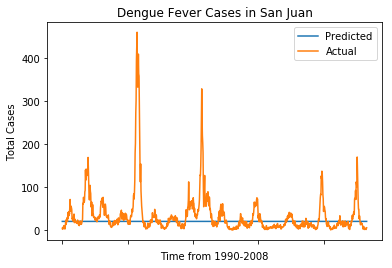

In [143]:
fig1, ax1 = plt.subplots()

plt.plot(sj_time, sj_sess.run(sj_predict, feed_dict={sj_x: sj_features, sj_keep_prob:1}), label="Predicted")
plt.plot(sj_time, sj_labels, label="Actual")
plt.xlabel("Time from 1990-2008")
plt.ylabel("Total Cases")
plt.title("Dengue Fever Cases in San Juan")
ax1.set_xticklabels([])
plt.legend()


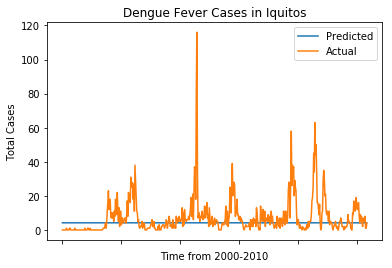

In [142]:
fig2, ax2 = plt.subplots()

plt.plot(iq_time, iq_sess.run(iq_predict, feed_dict={iq_x: iq_features, iq_keep_prob:1}), label="Predicted")
plt.plot(iq_time, iq_labels, label="Actual")
plt.xlabel("Time from 2000-2010")
plt.ylabel("Total Cases")
plt.title("Dengue Fever Cases in Iquitos")
ax2.set_xticklabels([])
plt.legend()
